In [17]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import nltk
from nltk import FreqDist
from IPython.display import display_html 

df = pd.read_csv(r'/Users/roselee/Downloads/Data Team/First_Step_Discovery_Pre-Survey_deid.csv')
df

,StartDate,EndDate,Progress,Duration..in.seconds.,Finished,RecordedDate,ResponseId,RecipientEmail,LocationLatitude,LocationLongitude,...,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18
0,Start Date,End Date,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Email,Location Latitude,Location Longitude,...,How prepared are you to locate primary and secondary sources using campus resources available to the public?,How many different physical or archival databases do you feel confident using for research purposes?,"What sets of skill, strategies, or values do you think are necessary to succeed in college?",Please rate the extent to which you agree with this statement: Creativity will be an important part of my Berkeley education.,"If you would like to explain your choice in the prior question, please do so here.",Please rate the extent to which you agree with this statement: Discovery will be an important part of my Berkeley education.,"If you would like to explain your choice in the prior question, please do so here.",Please rate the extent to which you agree with this statement: Community engagement is an important part of an undergraduate classroom experience.,"If you would like to explain your choice in the prior question, please do so here.",What does the phrase “Discovery experience” mean to you?
1,"{""ImportId"":""startDate"",""timeZone"":""America/Los_Angeles""}","{""ImportId"":""endDate"",""timeZone"":""America/Los_Angeles""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America/Los_Angeles""}","{""ImportId"":""_recordId""}","{""ImportId"":""recipientEmail""}","{""ImportId"":""locationLatitude""}","{""ImportId"":""locationLongitude""}",...,"{""ImportId"":""QID8""}","{""ImportId"":""QID9""}","{""ImportId"":""QID10_TEXT""}","{""ImportId"":""QID11""}","{""ImportId"":""QID12_TEXT""}","{""ImportId"":""QID13""}","{""ImportId"":""QID14_TEXT""}","{""ImportId"":""QID16""}","{""ImportId"":""QID15_TEXT""}","{""ImportId"":""QID19_TEXT""}"
2,2022-09-19 11:21:32,2022-09-19 11:23:04,100,92,True,2022-09-19 11:23:04,R_ROkLHxwUKqEic4F,NaN,37.8657,-122.2571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-09-19 14:35:47,2022-09-19 14:39:05,100,198,True,2022-09-19 14:39:06,R_3PHOVaeQ5oSzTyI,NaN,37.7652,-122.1579,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-09-21 09:56:12,2022-09-21 10:08:54,100,762,True,2022-09-21 10:08:55,R_1P7XGWEUGjA6Vk9,NaN,37.8657,-122.2571,...,Prepared,1-2,"Curiosity, determination, basic computer skills, some comfort talking to people and looking for help, creativity, ability to break problems down/organizational skills. With those things I think you can build necessary project-specific skills.",Strongly agree,NaN,Somewhat agree,NaN,Neither agree nor disagree,It's important be able to reach out to others for help but I think beyond that community is not so important.,Oof I guess it makes me think of published research or at least of synthesis done at home/not published.
5,2022-09-21 10:14:43,2022-09-21 10:18:23,100,219,True,2022-09-21 10:18:23,R_3KTImbjDeUAuusj,NaN,37.8657,-122.2571,...,Prepared,3-5,"time-management, perseverance, communication skills, responsibility",Strongly agree,NaN,Somewhat agree,NaN,Somewhat agree,NaN,NaN
6,2022-09-21 09:57:19,2022-09-21 10:32:36,100,2116,True,2022-09-21 10:32:36,R_1JEqFY7JjG4Bep3,NaN,37.7562,-122.4866,...,Unprepared,1-2,NaN,Strongly agree,NaN,Somewhat agree,NaN,Strongly agree,NaN,Nothing. I've never heard of that term before. I'm guessing it means an opportunity for research without the official side of writing a paper or conducting formal research. It's more about the experiencing something and learning about it.
7,2022-09-21 10:53:43,2022-09-21 11:06:11,100,748,True,2022-09-21 11:06:11,R_2SIeIzUcnAb2pKq,NaN,37.8657,-122.2571,...,Prepared,6-8,Dedication. Curiosity.,Somewhat agree,"Creativity in problem solving matters a lot, but in general following the facts wher

In [18]:
data = df
data.drop(labels = 1, axis = 0, inplace = True)
data.drop(['RecipientEmail', 'Finished', 'StartDate', 'EndDate', 'Progress', 'Duration..in.seconds.', 'RecordedDate', 'LocationLatitude', 'LocationLongitude', 'UserLanguage', 'DistributionChannel'], axis = 1, inplace = True)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 0)
data

,ResponseId,Q2,Q2_20_TEXT,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18
0,Response ID,Which of the following courses has requested you to take this survey? - Selected Choice,"Which of the following courses has requested you to take this survey? - Other course, please specify: - Text",What comes to mind when you hear the word “research”?,Imagine you were assigned to research a specific topic or question. Briefly describe the steps you would take to get this information.,"In your own words, describe a primary source.","In your own words, describe a secondary source.",How clear is your understanding of research?,How confident are you to conduct a research project?,How prepared are you to locate primary and secondary sources using campus resources available to the public?,How many different physical or archival databases do you feel confident using for research purposes?,"What sets of skill, strategies, or values do you think are necessary to succeed in college?",Please rate the extent to which you agree with this statement: Creativity will be an important part of my Berkeley education.,"If you would like to explain your choice in the prior question, please do so here.",Please rate the extent to which you agree with this statement: Discovery will be an important part of my Berkeley education.,"If you would like to explain your choice in the prior question, please do so here.",Please rate the extent to which you agree with this statement: Community engagement is an important part of an undergraduate classroom experience.,"If you would like to explain your choice in the prior question, please do so here.",What does the phrase “Discovery experience” mean to you?
2,R_ROkLHxwUKqEic4F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,R_3PHOVaeQ5oSzTyI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,R_1P7XGWEUGjA6Vk9,French 146A,NaN,"Data collection, analysis, and synthesis","Lay out goals and questions, then look for things previously published on the topic and relevant sources/references.",A source of information that is not analyzed by a third party.,"A source of information that analyzes, summarizes, or is based on information from another information source.",Unclear,Very Unconfident,Prepared,1-2,"Curiosity, determination, basic computer skills, some comfort talking to people and looking for help, creativity, ability to break problems down/organizational skills. With those things I think you can build necessary project-specific skills.",Strongly agree,NaN,Somewhat agree,NaN,Neither agree nor disagree,It's important be able to reach out to others for help but I think beyond that community is not so important.,Oof I guess it makes me think of published research or at least of synthesis done at home/not published.
5,R_3KTImbjDeUAuusj,French 146A,NaN,"lab, data, experiment","I would read about it, try to come up with a hypothesis to answer the question, conduct a study/experiment, gather results, then form a conclusion.",A primary source is a direct account.,"A secondary source is information gathered about something indirectly, not from the subject itself.",Clear,Unconfident,Prepared,3-5,"time-management, perseverance, communication skills, responsibility",Strongly agree,NaN,Somewhat agree,NaN,Somewhat agree,NaN,NaN
6,R_1JEqFY7JjG4Bep3,French 146A,NaN,Research is an investigation into a specific topic using experiments and observations to come to conclusions about the topic or to form more hypotheses.,"I would use the resources available to me that pertain to the topic. I would use the Internet and the databases provided by UC Berkeley, look for books in the libraries on campus, and consult professors who teach that topic. Then I would compile the knowledge I have gained to analyse whether other steps would need to be taken to conduct further research, such as visiting other research sites, observing phenomena related to my topic, or conducting an experiment or survey to pull

In [19]:
question = ['Q2_20_TEXT', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18'] 
data = data.dropna(subset=question, how='all')
data.reset_index(drop=True)
data_noQ = data.drop(labels = 0, axis = 0)
data_noQ = data_noQ.loc[data_noQ["ResponseId"] != 'R_2rkefwCYYVUUwDp']
pd.set_option('display.max_colwidth', 0)

In [20]:
q7 = data_noQ['Q7'].value_counts().to_frame()
q7 = pd.concat({'How clear is your understanding of research?': q7}, names=['Q7'])
q7 = q7.rename(columns={'Q7': 'Count'})
q7['Total'] = q7['Count'].sum()
q7['Frequency'] = q7['Count']/q7['Total']
q7

Count  Total  \
Q7                                                                        
How clear is your understanding of research? Clear         119    149     
                                             Unclear       20     149     
                                             Very Clear    9      149     
                                             Very Unclear  1      149     

                                                           Frequency  
Q7                                                                    
How clear is your understanding of research? Clear         0.798658   
                                             Unclear       0.134228   
                                             Very Clear    0.060403   
                                             Very Unclear  0.006711

In [21]:
q8 = data_noQ['Q8'].value_counts().to_frame()
q8 = pd.concat({'How confident are you to conduct a research project?': q8}, names=['Q8'])
q8 = q8.rename(columns={'Q8': 'Count'})
q8['Total'] = q8['Count'].sum()
q8['Frequency'] = q8['Count']/q8['Total']
q8

Count  \
Q8                                                                             
How confident are you to conduct a research project? Confident         87      
                                                     Unconfident       49      
                                                     Very Confident    7       
                                                     Very Unconfident  6       

                                                                       Total  \
Q8                                                                             
How confident are you to conduct a research project? Confident         149     
                                                     Unconfident       149     
                                                     Very Confident    149     
                                                     Very Unconfident  149     

                                                                       Frequency  
Q8                                                                                
How confident are you to conduct a research project? Confident         0.583893   
                                                     Unconfident       0.328859   
                                                     Very Confident    0.046980   
                                                     Very Unconfident  0.040268

In [22]:
q9 = data_noQ['Q9'].value_counts().to_frame()
q9 = pd.concat({'How prepared are you to locate primary and secondary sources using campus resources available to the public?': q9}, names=['Q9'])
q9 = q9.rename(columns={'Q9': 'Count'})
q9['Total'] = q9['Count'].sum()
q9['Frequency'] = q9['Count']/q9['Total']
q9

Count  \
Q9                                                                                                                                    
How prepared are you to locate primary and secondary sources using campus resources available to the public? Prepared         77      
                                                                                                             Unprepared       60      
                                                                                                             Very Prepared    9       
                                                                                                             Very Unprepared  3       

                                                                                                                              Total  \
Q9                                                                                                                                    
How prepared are you to locate primary and secondary sources using campus resources available to the public? Prepared         149     
                                                                                                             Unprepared       149     
                                                                                                             Very Prepared    149     
                                                                                                             Very Unprepared  149     

                                                                                                                              Frequency  
Q9                                                                                                                                       
How prepared are you to locate primary and secondary sources using campus resources available to the public? Prepared         0.516779   
                                                                                                             Unprepared       0.402685   
                                                                                                             Very Prepared    0.060403   
                                                                                                             Very Unprepared  0.020134

In [23]:
q10 = data_noQ['Q10'].value_counts().to_frame()
q10 = pd.concat({'How many different physical or archival databases do you feel confident using for research purposes?': q10}, names=['Q10'])
q10 = q10.rename(columns={'Q10': 'Count'})
q10['Total'] = q10['Count'].sum()
q10['Frequency'] = q10['Count']/q10['Total']
q10

Count  \
Q10                                                                                                                
How many different physical or archival databases do you feel confident using for research purposes? 1-2   61      
                                                                                                     3-5   61      
                                                                                                     6-8   14      
                                                                                                     0     8       
                                                                                                     9-10  5       

                                                                                                           Total  \
Q10                                                                                                                
How many different physical or archival databases do you feel confident using for research purposes? 1-2   149     
                                                                                                     3-5   149     
                                                                                                     6-8   149     
                                                                                                     0     149     
                                                                                                     9-10  149     

                                                                                                           Frequency  
Q10                                                                                                                   
How many different physical or archival databases do you feel confident using for research purposes? 1-2   0.409396   
                                                                                                     3-5   0.409396   
                                                                                                     6-8   0.093960   
                                                                                                     0     0.053691   
                                                                                                     9-10  0.033557

In [24]:
finaldf = pd.read_csv(r'/Users/roselee/Downloads/Data Team/First_Step_Discovery_Pre-Survey_final_deid.csv')
finaldf

,ID,Instructors,Section,Q2---Which of the following courses has requested you to take this survey?,Q3---What comes to mind when you hear the word research?,Q4---Imagine you were assigned to research a specific topic or question. Briefly describe the steps you would take to get this information.,"Q5---In your own words, describe a primary source.","Q6---In your own words, describe a secondary source.",Q7---How clear is your understanding of research?,Q8---How confident are you to conduct a research project?,Q9---How prepared are you to locate primary and secondary sources using campus resources available to the public?,Q10---How many different physical or archival databases do you feel confident using for research purposes?,"Q11---What sets of skill, strategies, or values do you think are necessary to succeed in college?",Q12---Creativity will be an important part of my Berkeley education.,"Q13---If you would like to explain your choice in the prior question, please do so here.",Q14---Discovery will be an important part of my Berkeley education.,"Q15---If you would like to explain your choice in the prior question, please do so here.",Q16---Community engagement is an important part of an undergraduate classroom experience.,"Q17---If you would like to explain your choice in the prior question, please do so here.",Q18---What does the phrase Discovery experience mean to you?
0,S001,Richard Kern,1,FRENCH146A,"Data collection, analysis, and synthesis","Lay out goals and questions, then look for things previously published on the topic and relevant sources/references.",A source of information that is not analyzed by a third party.,"A source of information that analyzes, summarizes, or is based on information from another information source.",Unclear,Very Unconfident,Prepared,1 to 2,"Curiosity, determination, basic computer skills, some comfort talking to people and looking for help, creativity, ability to break problems down/organizational skills. With those things I think you can build necessary project-specific skills.",Strongly agree,NaN,Somewhat agree,NaN,Neither agree nor disagree,It's important be able to reach out to others for help but I think beyond that community is not so important.,Oof I guess it makes me think of published research or at least of synthesis done at home/not published.
1,S002,Richard Kern,1,FRENCH146A,"lab, data, experiment","I would read about it, try to come up with a hypothesis to answer the question, conduct a study/experiment, gather results, then form a conclusion.",A primary source is a direct account.,"A secondary source is information gathered about something indirectly, not from the subject itself.",Clear,Unconfident,Prepared,3 to 5,"time-management, perseverance, communication skills, responsibility",Strongly agree,NaN,Somewhat agree,NaN,Somewhat agree,NaN,NaN
2,S003,Richard Kern,1,FRENCH146A,Research is an investigation into a specific topic using experiments and observations to come to conclusions about the topic or to form more hypotheses.,"I would use the resources available to me that pertain to the topic. I would use the Internet and the databases provided by UC Berkeley, look for books in the libraries on campus, and consult professors who teach that topic. Then I would compile the knowledge I have gained to analyse whether other steps would need to be taken to conduct further research, such as visiting other research sites, observing phenomena related to my topic, or conducting an experiment or survey to pull in further results. I would record all my findings and write it in a paper.",A primary source is something or someone with firsthand knowledge or experience of the information I am looking into.,A secondary source could come from someone else who is researching the topic but who doesn't have personal information on the subject.,Unclear,Very Unconfident,Unprepared,1 to 2,NaN,Strongly agree,NaN,Somewhat agree,NaN,Strongly agree,NaN,Nothing. I've never heard of that term before. I'm gu

In [25]:
# clean and prepare text for analysis
def preprocess(data, replace = []):
    """
    data = 1 sentence, or 1 row in the unique_responses dataframe
    """
    stopwords = nltk.corpus.stopwords.words('english')
    stopwords.append('nan')
    stopwords.extend(replace)
            
    cleaned_text = []
    lower_text = data.lower().strip().replace(',', '').replace('.','').replace(',', '')
    
    lemmatizer = nltk.stem.WordNetLemmatizer()
    text_with_pos = nltk.pos_tag(lower_text.split())
    for word, pos in text_with_pos:
        if word not in stopwords:
            if "VB" in pos: # verbs
                tag = "v"
            elif "JJ" in pos: # adjectives
                tag = "a"
            elif "RB" in pos: # adverbs
                tag = "r"
            else:
                tag = "n" # default to nouns
            lemma = lemmatizer.lemmatize(word, pos=tag)
            cleaned_text.append(lemma)
    return re.sub("[\'\\n]"," ", " ".join(cleaned_text))


#if you want to batch INCLUDING stopwords: use Qnum_word_t
#else, use Qnum_word
    
#batch analysis overall
def overall_batch(Qnum_word):
    #Qnum_word is a string with all the responses separated only by spaces
    word = Qnum_word.split()
    wfreq=[word.count(w) for w in word]
    dictionary = dict(zip(word ,wfreq))
    freq = pd.DataFrame.from_dict(dictionary, orient='index').sort_values(by =[0], ascending = False)
    freq = freq[freq[0] > 1]
    freq.rename(columns={0: 'Count'}, inplace=True)
    freq['Total'] = freq['Count'].sum()
    freq['Frequency (%)'] = (freq['Count']/freq['Total']) * 100
    return freq

#batch in specific courses 
def course_batch(course):
    ins = finaldf[finaldf['Q2---Which of the following courses has requested you to take this survey?'] == course]
    ins = ins[['Instructors',
               'Section',
               'Q5---In your own words, describe a primary source.',
               'Q6---In your own words, describe a secondary source.',
               'Q13---If you would like to explain your choice in the prior question, please do so here.', 
               'Q15---If you would like to explain your choice in the prior question, please do so here.',
               'Q17---If you would like to explain your choice in the prior question, please do so here.']]
    ins = ins.sort_values(by = ['Instructors', 'Section']).dropna(how='all').reset_index(drop=True)
    return ins

all_courses = finaldf['Q2---Which of the following courses has requested you to take this survey?'].unique()
all_courses

for c in all_courses: 
    print(c)
    display(course_batch(c))


FRENCH146A


,Instructors,Section,"Q5---In your own words, describe a primary source.","Q6---In your own words, describe a secondary source.","Q13---If you would like to explain your choice in the prior question, please do so here.","Q15---If you would like to explain your choice in the prior question, please do so here.","Q17---If you would like to explain your choice in the prior question, please do so here."
0,Richard Kern,1,A source of information that is not analyzed by a third party.,"A source of information that analyzes, summarizes, or is based on information from another information source.",NaN,NaN,It's important be able to reach out to others for help but I think beyond that community is not so important.
1,Richard Kern,1,A primary source is a direct account.,"A secondary source is information gathered about something indirectly, not from the subject itself.",NaN,NaN,NaN
2,Richard Kern,1,A primary source is something or someone with firsthand knowledge or experience of the information I am looking into.,A secondary source could come from someone else who is researching the topic but who doesn't have personal information on the subject.,NaN,NaN,NaN
3,Richard Kern,1,A source with first-hand knowledge of something.,Sources which bring first-hand knowledge alongside information after the fact.,"Creativity in problem solving matters a lot, but in general following the facts where they lead does not seem to implicate a lot of creativity.",NaN,NaN
4,Richard Kern,1,"something directly from period you're studying. if you're studying WW2 and you find a letter from a soldier talking about a battle he was in, that's a primary source",something written long after the period you're studying. it's usually written by scholars and reflecting on most important developments of certain period,NaN,NaN,NaN


CWPR4B


,Instructors,Section,"Q5---In your own words, describe a primary source.","Q6---In your own words, describe a secondary source.","Q13---If you would like to explain your choice in the prior question, please do so here.","Q15---If you would like to explain your choice in the prior question, please do so here.","Q17---If you would like to explain your choice in the prior question, please do so here."
0,Belinda Kremer,8,A source that was there during the time of the event.,A source that studied a primary source.,I feel like within a lot of classes they kind of make it robotic in the structure where there really is no room for creativity for students to truly show who they are within the projects/assignments,NaN,NaN
1,Belinda Kremer,8,A primary source is something that has actually been through the experience,"A secondary source is something that has heard and was known to the experience, but did not actually go through the experience",NaN,NaN,NaN
2,Belinda Kremer,8,A primary source is a source that experiments and creates the content themselves for the first time.,A secondary source is a source that takes information from a primary source and manipulate it with their own data or opinion.,NaN,NaN,NaN
3,Belinda Kremer,8,A primary source is a main source used to find information.,A secondary source is a source used to find answers to questions that arose from the primary source.,NaN,NaN,NaN
4,Belinda Kremer,8,An artifact/article that directly relates to the research in some way.,An article that is not directly related to the event but speaks on the research.,NaN,NaN,NaN
5,Belinda Kremer,8,A primary source is a source that depicts or describes an event or occurrence as a result of first-hand experience.,A secondary source is an analysis or augmentation of an occurrence based upon the data given by a primary source.,NaN,NaN,NaN
6,Belinda Kremer,8,A source that is the original copy or version of the information.,"A transcribed or copied version of the source, a source based on the primary source.",NaN,NaN,NaN
7,Belinda Kremer,8,"A primary source is a source that is untouched, unprocessed, or interpreted. It is the raw material from which conclusions and research are conducted.",A secondary source is a source that is not the original source of information but an interpretation or conclusion from the primary source.,"In some classes, I feel I'm being tested on memorization and my ability to reproduce findings in the exact way the professor has done, rather than being encouraged to find my own paths and be creative.",NaN,NaN
8,Belinda Kremer,8,"A source directly from the person who stated it, such as an interview or autobiography.","A source that someone has written about someone else, such as a news article or biography.",NaN,NaN,NaN
9,Belinda Kremer,8,"A primary source is something that has information from a first hand source, someone that was there to witness it or tell it how they themselves observed it.","A secondary source is somebody who was not there, but has gathered information from somebody who was there.",NaN,NaN,NaN


CWPR4A


,Instructors,Section,"Q5---In your own words, describe a primary source.","Q6---In your own words, describe a secondary source.","Q13---If you would like to explain your choice in the prior question, please do so here.","Q15---If you would like to explain your choice in the prior question, please do so here.","Q17---If you would like to explain your choice in the prior question, please do so here."
0,Belinda Kremer,8,"a primary source is a source that has not been transcribed or written down from different sources of information. In a way, it is the original source of information","A secondary source compiles information from primary sources into a location. This includes research papers, journals, and textbooks.",I think creativity is extremely important in problem solving and I think that it will help me in everything I do at Berkeley.,I think that limiting oneself to a small bubble will only stunt their personal growth. Giving oneself the ability to expand and discover things that are hidden further develop a person's critical thinking and it will benefit them greatly in the future.,It is rare to accomplish great feats alone. It is almost certain that individuals will work with others on problems and it is important to engage with several different communities to get a broader understanding of a topic from multiple angles.
1,Carmen Acevedo Butcher,16,A primary source is a source that comes firsthand and is either based on experience or a research study.,A secondary source is a formulated opinion or summary of a primary source.,NaN,NaN,NaN
2,Donnett Flash,1,A primary source is a source from the original event or occurrence.,A secondary source is one that describes an event or occurrence but was not present at it.,NaN,NaN,NaN
3,Donnett Flash,1,I’m not sure what that is.,I’m not sure what that is,I’m not sure how to be creative in a university that’s tailored to one side.,I’m not really sure,It’s essential to collaborate and connect with your peers
4,Donnett Flash,1,A source that has first-hand experience with a topic.,A source that has second-hand experience with a topic.,NaN,NaN,NaN
5,Donnett Flash,1,"A primary source is a source that comes from the question or topic itself. If the topic is about WW2, then a primary source would be a document or letter that was written around the time period of WW2 about WW2.","A secondary source is a source that is written about something. If the topic is about WW2, a secondary source would be a website about WW2, or research papers about WW2.",NaN,NaN,NaN
6,Donnett Flash,1,if the information comes from a person who witnessed the event or the documentation of it,"media or sources which reinforce ideas stated in primary source-- documents, photographs",NaN,NaN,NaN
7,Donnett Flash,1,"A primary source is information written directly by the person who has experienced it. For example, a primary source regarding the experience of COVID-19 in K-12 schools could be written by anyone who was in K-12 during the time of COVID.",A secondary source is somebody reporting on/writing information about a primary source.,I feel as though the strict academic rigor of Berkeley prohibits some degree of creativity.,"A lot of what we are learning is stuff that has already been discovered, but I feel like there are definite opportunities to expand upon discovery here.",Community engagement prevents isolation that can inhibit prosperity.
8,Donnett Flash,1,A primary source is a source that has personal experience.,A secondary source is a source that has knowledge about the primary source.,Creativity can depend on what your major is.,I do not have too much knowledge on subjects so Berkeley fills in those gaps.,NaN
9,Donnett Flash,1,A source that is from that time when a topic was first discovered.,"It's someone who may be an expert writing about a topic or subject but they are not from that time, they are most likely from this day in age.",NaN,NaN,NaN


JAPAN1A


,Instructors,Section,"Q5---In your own words, describe a primary source.","Q6---In your own words, describe a secondary source.","Q13---If you would like to explain your choice in the prior question, please do so here.","Q15---If you would like to explain your choice in the prior question, please do so here.","Q17---If you would like to explain your choice in the prior question, please do so here."
0,Chika Shibahara,2,First-hand information.,Second-hand information.,NaN,NaN,NaN
1,Chika Shibahara,2,"personal experience, accounts from people who experienced events first hand (journal entry with personal account of event, video of event)",some other person writing about a primary source (an article reviewing an event that happened),NaN,NaN,NaN
2,Chika Shibahara,2,A primary source is a firsthand report of the data.,A secondary source is a source of information by someone who did not experience the collection of the data.,NaN,NaN,NaN
3,Chika Shibahara,2,"A primary source is a source that comes directly from someone who either is or was directly involved with the topic of interest. For example, a primary source about a battle in the Iraq War might be a general or soldier who was on the ground in Iraq and involved in that specific battle, and was therefore directly involved with the topic of interest.","A secondary source is a source that discusses, dissects, and handles primary sources. For example, if someone who did not have on-the-ground war experience wrote a book about the Iraq War in which they studied primary sources and cited them throughout as they constructed a certain historical narrative, they would be creating a secondary source.",Creativity is key if one wishes to produce new ideas and move forward into the future.,Discovery is why we are here. We are here to learn and discover new things.,Humans are social animals. Socializing and community engagement uplifts and greatly enhances our experience.
4,Chika Shibahara,2,"A primary source is the source material, the original.",A secondary source is an edited work or when someone did not witness it but still wrote about the event.,"Creativity is in everything, the way you write, dress, speak, etc. I like to try my best to be creative in everything I do.","Discovering different ideas, cultures, backgrounds, and what I want to focus on in life is very important to me.",Engaging with the community is a great way to strengthen bonds as well as a way to make yourself feel good.
5,Chika Shibahara,2,Outputs generated by yourself,Findings of someone else,NaN,NaN,NaN
6,Chika Shibahara,5,Source that makes original claims,Sources that reference primary sources,NaN,NaN,NaN
7,Chika Shibahara,5,The internet,experience,NaN,NaN,NaN
8,Chika Shibahara,5,A primary source is the original material in which a text was written in.,A secondary source is the material which references the primary source and uses it in their text to support their idea.,NaN,NaN,NaN


EALR1B


,Instructors,Section,"Q5---In your own words, describe a primary source.","Q6---In your own words, describe a secondary source.","Q13---If you would like to explain your choice in the prior question, please do so here.","Q15---If you would like to explain your choice in the prior question, please do so here.","Q17---If you would like to explain your choice in the prior question, please do so here."
0,Robert Ashmore; Susan Eberhard,2,A source that comes directly from a person.,"A source that doesn't directly come from a person, but comes from someone else who analyzed that person.",NaN,NaN,NaN
1,Robert Ashmore; Susan Eberhard,2,Primary source is a direct source?,Secondary is something quoted or rewritten by someone else.,NaN,NaN,NaN
2,Robert Ashmore; Susan Eberhard,2,"A primary source is a firsthand source. For example if there was a fire, a primary source would be someone who was at the scene of the fire.",A secondary source is a second hand source.,NaN,NaN,NaN
3,Robert Ashmore; Susan Eberhard,2,A primary source is a first-hand scholarly source of information that has done its own research and study.,A secondary source cites studies done in primary sources and does additional analysis.,NaN,NaN,NaN
4,Robert Ashmore; Susan Eberhard,2,"A primary source is one directly from a writer that was in the time period of your research topic or has direct relations to your research, whether that be that they themselves have done scientific research on the topic or something like that.",A secondary source is one that is not directly from someone related to your topic but is a writing about the topic. So basically another person's research on a topic.,NaN,NaN,NaN
5,Robert Ashmore; Susan Eberhard,2,A primary source is a resource that's directly linked to whatever you're researching and that has first-hand knowledge/experience of that topic.,"A secondary source is a resource that doesn't have first-hand knowledge/experience, but does have verified information about something that's been gathered from other sources that may have been primary.",NaN,NaN,NaN
6,Robert Ashmore; Susan Eberhard,2,A primary source is a source coming directly from someone who was at the scene of the event or something original,A secondary source is a source that writes or presents about the event who wasn't at the scene to actually witness it.,NaN,NaN,NaN
7,Robert Ashmore; Susan Eberhard,2,A primary source is an artifact or document that is coming straight from the source itself.,"A secondary source is when someone writes about a primary source, analyzing it.",NaN,NaN,I think that is important to get involved outside of the classroom in order to gain experience in real world scenarios.
8,Robert Ashmore; Susan Eberhard,2,A primary source is produced at or near the time of the event which it is describing.,A secondary source branches off of a primary source in order to convey information about a certain topic or event.,NaN,NaN,NaN
9,Robert Ashmore; Susan Eberhard,2,first-hand account,second-hand account,NaN,NaN,NaN


CWPR1A


,Instructors,Section,"Q5---In your own words, describe a primary source.","Q6---In your own words, describe a secondary source.","Q13---If you would like to explain your choice in the prior question, please do so here.","Q15---If you would like to explain your choice in the prior question, please do so here.","Q17---If you would like to explain your choice in the prior question, please do so here."
0,Donnett Flash,1,"direct source to a piece of information: eyewitness testimony, newspaper, piece of art, artifact",a source written about a primary source,NaN,NaN,NaN
1,Donnett Flash,1,A source that is a firsthand account of something,A source that is explaining a secondhand account of something,NaN,NaN,NaN
2,Donnett Flash,1,A primary source is a place where the more rudimentary information is from.,A secondary source is a place that has back up information supporting the primary source,Creativity is essential in expanding understanding of the world around oneself. To succeed in Berkeley having a creative outlook can lead to a unique resolution to real-world applications.,Learning about yourself and how you fit into the world is an essential part of the college experience.,Without building a strong sense of community moving on will help continue involvement in the environment around ones self.
3,Donnett Flash,4,A primary source is a source that comes directly from what the topic is relating too.,"Secondary source is a source that comes from indirectly, like someone reporting an issue rather experiencing it.",NaN,NaN,NaN
4,Robert Ashmore; Susan Eberhard,2,"An account from a person who experienced or witnessed what they wrote about, or a source that was the first of its kind in analyzing a specific topic.","A written analysis of a primary source, a third person view of an initial account.",NaN,NaN,NaN
5,Teri Crisp,9,"A source from a interview, something we see, hear directly.",A secondary resource can be a scholarly reading.,"The society in changing, and the education program needs to catch up with the current issue, situation, and culture.",NaN,NaN
6,Teri Crisp,33,Something that had firsthand views on the topic.,"Something that uses primary resources to keep analyzing, spreading the information.",NaN,NaN,NaN
7,Teri Crisp,33,Knowledge given in course content.,Credible sources online.,NaN,NaN,NaN
8,Teri Crisp,33,where you get the most relative information,where you get the less relative information,NaN,NaN,NaN
9,Teri Crisp,33,NaN,NaN,NaN,NaN,NaN


In [26]:
Q3_raw = finaldf['Q3---What comes to mind when you hear the word research?'].values
Q3_word = []

replace_3 = ['research', 'new', 'think', 'word', 'discovery', '"research"']

for ans in Q3_raw:
    Q3_word.append(preprocess(str(ans), replace_3))

Q3_word = ' '.join(str(x) for x in Q3_word)
Q3_word

#for batching (stopwords included)
Q3_word_t = ', '.join(str(x) for x in Q3_raw)
Q3_word_t = preprocess(Q3_word_t).replace(',', '')
Q3_word_t

styler1 = overall_batch(Q3_word_t).style.set_table_attributes("style='display:inline'").set_caption('STOPWORDS INCLUDED')
styler2 = overall_batch(Q3_word).style.set_table_attributes("style='display:inline'").set_caption('STOPWORDS EXCLUDED')
display_html(styler1._repr_html_()+styler2._repr_html_(), raw=True)

,Count,Total,Frequency (%)
research,71,1315,5.399240
topic,51,1315,3.878327
think,48,1315,3.650190
information,44,1315,3.346008
new,34,1315,2.585551
find,31,1315,2.357414
question,30,1315,2.281369
hear,23,1315,1.749049
idea,22,1315,1.673004
source,19,1315,1.444867


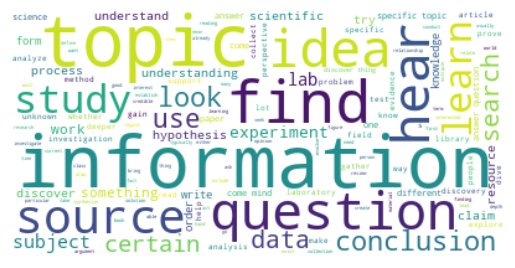

In [32]:
wordcloud = WordCloud(background_color="white").generate(Q3_word)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("Q3wordcloud.png")

In [34]:
Q11_raw = finaldf['Q11---What sets of skill, strategies, or values do you think are necessary to succeed in college?'].values
Q11_word = []
replace_11 = ['skill', 'think', 'college', 'values', 'strategies', 'good', 'important', 'succeed', 'well', 'skills', 'necessary', 'ability', 'something']

for ans in Q11_raw:
    Q11_word.append(preprocess(str(ans), replace_11))
Q11_word = ' '.join(str(x) for x in Q11_word)

#for batching (stopwords included)
Q11_word_t = ', '.join(str(x) for x in Q11_raw)
Q11_word_t = preprocess(Q11_word_t).replace(',', '')
Q11_word_t

styler1 = overall_batch(Q11_word_t).style.set_table_attributes("style='display:inline'").set_caption('STOPWORDS INCLUDED')
styler2 = overall_batch(Q11_word).style.set_table_attributes("style='display:inline'").set_caption('STOPWORDS EXCLUDED')
display_html(styler1._repr_html_()+styler2._repr_html_(), raw=True)

,Count,Total,Frequency (%)
time,52,1140,4.561404
management,42,1140,3.684211
think,41,1140,3.596491
skill,36,1140,3.157895
college,26,1140,2.280702
ability,26,1140,2.280702
good,25,1140,2.192982
succeed,23,1140,2.017544
research,22,1140,1.929825
necessary,21,1140,1.842105


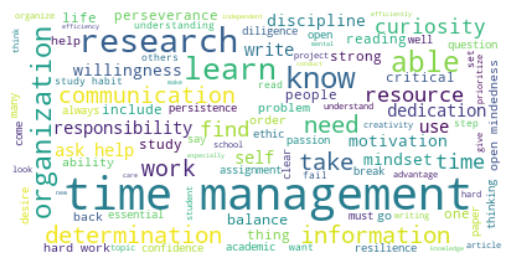

In [35]:
wordcloud = WordCloud(background_color="white", max_words = 100).generate(Q11_word)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("Q11wordcloud.png")

In [36]:
Q18_raw = finaldf['Q18---What does the phrase Discovery experience mean to you?'].values
Q18_word = []

replace_18 = ['discovery experience', 'experience', 'mean', 'new', 'something', 'things', 'discovering', 'discovery', '""']

for ans in Q18_raw:
    Q18_word.append(preprocess(str(ans), replace_18))

Q18_word = ' '.join(str(x) for x in Q18_word)
for r in replace_18:
    Q18_word = Q18_word.replace(r, '')
    
Q18_word

#for batching (stopwords included)
Q18_word_t = ', '.join(str(x) for x in Q18_raw)
Q18_word_t = preprocess(Q18_word_t).replace(',', '')

styler1 = overall_batch(Q18_word_t).style.set_table_attributes("style='display:inline'").set_caption('STOPWORDS INCLUDED')
styler2 = overall_batch(Q18_word).style.set_table_attributes("style='display:inline'").set_caption('STOPWORDS EXCLUDED')
display_html(styler1._repr_html_()+styler2._repr_html_(), raw=True)

,Count,Total,Frequency (%)
experience,79,991,7.971746
new,62,991,6.256307
learn,55,991,5.549950
mean,52,991,5.247225
something,44,991,4.439960
discovery,43,991,4.339051
discover,31,991,3.128153
find,30,991,3.027245
research,27,991,2.724521
thing,23,991,2.320888


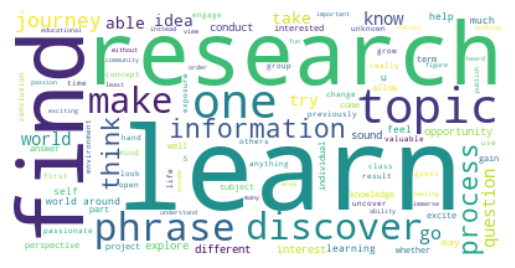

In [37]:
wordcloud = WordCloud(background_color="white", max_words = 100).generate(Q18_word)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("Q18wordcloud.png")